<a href="https://colab.research.google.com/github/msouto/20232_Estatistica_para_Engenharia/blob/main/Ex_10_testes_de_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes de hipoteses

Quando você faz o fitting de uma distribuição a partir dos seus dados, é fundamental interpretar os resultados e fazer hipóteses ou conclusões apropriadas. Aqui estão algumas etapas e considerações para gerar hipóteses a partir dos dados após o fitting da distribuição:

Identifique a Distribuição Ajustada: Primeiro, identifique qual distribuição (por exemplo, normal, exponencial, gamma, etc.) melhor se ajusta aos seus dados com base em critérios como o coeficiente de determinação (R²), o critério de informação de Akaike (AIC), o teste de Kolmogorov-Smirnov, entre outros.

Interpretação dos Parâmetros: Cada distribuição ajustada terá seus próprios parâmetros (como média, desvio padrão, forma, escala, etc.). Entenda o significado desses parâmetros em relação ao seu conjunto de dados. Por exemplo, em uma distribuição normal, a média e o desvio padrão são parâmetros cruciais.

Teste de Hipótese: Com base na distribuição ajustada e nos parâmetros associados, você pode formular hipóteses sobre seus dados. Por exemplo:

Média: Se a distribuição é normal, você pode testar se a média dos seus dados é significativamente diferente de um valor específico usando um teste t.
Variabilidade: Se a distribuição é exponencial, você pode testar a hipótese de que a taxa de falha é constante ao longo do tempo.
Valide suas Hipóteses: Use métodos estatísticos adicionais, como testes de hipóteses, intervalos de confiança ou outras técnicas estatísticas relevantes para validar ou refutar suas hipóteses.

Aplicação Prática: Além de fazer inferências estatísticas, pense em como essas hipóteses podem ser aplicadas na prática. Por exemplo, se seus dados seguem uma distribuição exponencial, você pode inferir sobre a taxa de falha de um sistema ao longo do tempo e fazer previsões sobre a durabilidade ou vida útil desse sistema.

Considere Limitações: Sempre esteja ciente das limitações associadas ao fitting de distribuição. Nem sempre é possível encontrar uma distribuição perfeita que se ajuste aos seus dados. Além disso, a escolha da distribuição e a interpretação dos resultados devem ser feitas com cautela, considerando o contexto dos dados e as suposições feitas.

Em resumo, o fitting de distribuição é apenas uma ferramenta na caixa de ferramentas analíticas. O objetivo principal é obter insights úteis sobre seus dados, fazer previsões ou tomar decisões informadas. A chave é abordar a análise de forma holística, combinando fitting de distribuição com outros métodos estatísticos e considerando o contexto dos seus dados e do problema em questão.

Neste exemplo, seguiremos os seguintes passos:

1.   Gerar dados aleatórios que se assemelham a uma distribuição normal.
2.   Ajustar uma distribuição normal aos dados simulados.
3.   Formular hipóteses sobre a média e variância dos dados.
4.   Escolher e realizar testes de hipóteses relevantes.
5.   Avaliar os resultados.





Valor p: 0.14759031545459111
Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.


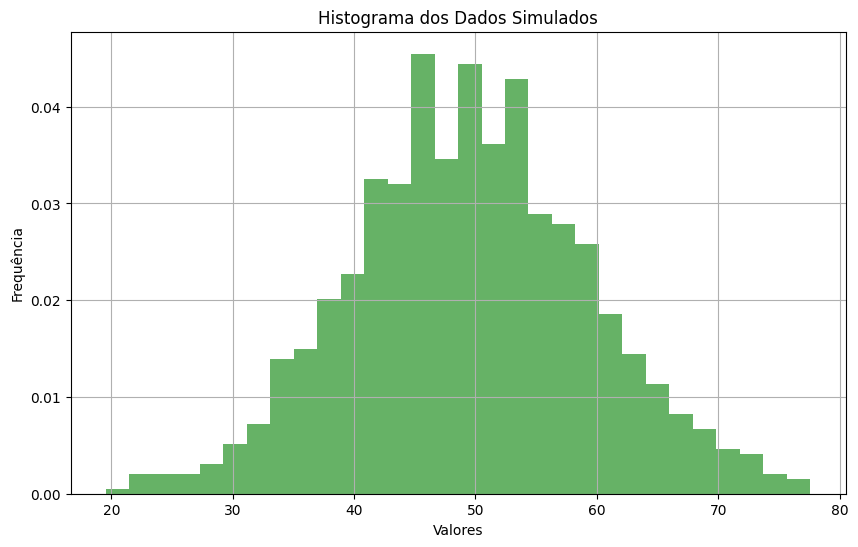

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuração para visualização no Google Colab
%matplotlib inline

# Passo 1: Gerar dados aleatórios
np.random.seed(0)  # Para reprodutibilidade
dados = np.random.normal(loc=50, scale=10, size=1000)  # Dados simulados com média 50 e desvio padrão 10

# Passo 2: Ajustar uma distribuição normal aos dados (já sabemos que os dados são normais neste exemplo)
media_amostral = np.mean(dados)
desvio_padrao_amostral = np.std(dados)

# Passo 3: Formular hipóteses
# Hipótese nula: A média é 50
# Hipótese alternativa: A média é diferente de 50 (dois lados)

# Passo 4: Escolher e realizar testes de hipóteses
# Vamos usar um teste t de uma amostra
t_statistic, p_value = stats.ttest_1samp(dados, 50)

print(f"Valor p: {p_value}")

# Passo 5: Avaliar os resultados
alpha = 0.05  # Nível de significância escolhido
if p_value < alpha:
    print("Rejeitamos a hipótese nula. A média dos dados é estatisticamente diferente de 50.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.")

# Visualização
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma dos Dados Simulados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



Vamos expandir o exemplo anterior para incluir o teste de normalidade de Shapiro-Wilk como uma etapa adicional antes de realizar o teste t de uma amostra.

O teste de Shapiro-Wilk é comumente usado para verificar se um conjunto de dados segue uma distribuição normal.

Valor p do teste de Shapiro-Wilk: 0.5916484594345093
Não temos evidências para rejeitar a hipótese nula. Os dados podem seguir uma distribuição normal.

Valor p do teste t de uma amostra: 0.14759031545459111
Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.


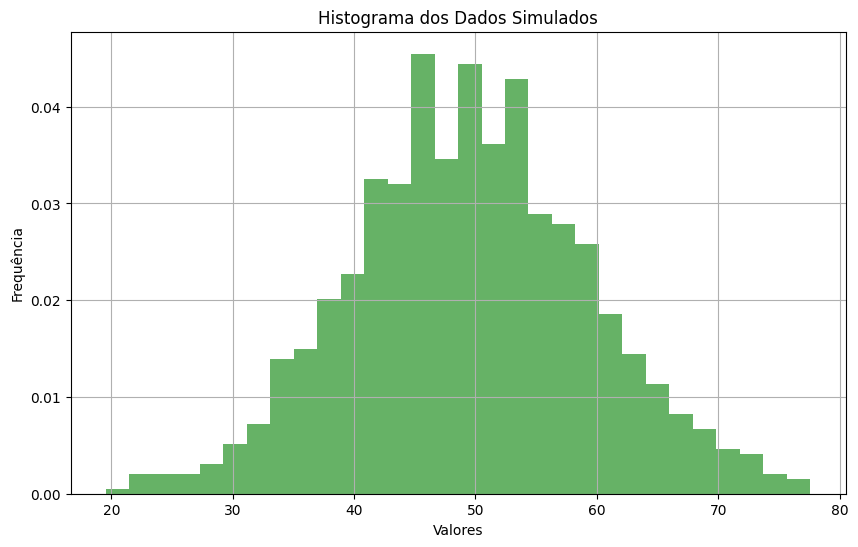

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuração para visualização no Google Colab
%matplotlib inline

# Gerar dados aleatórios
np.random.seed(0)
dados = np.random.normal(loc=50, scale=10, size=1000)

# Passo 1: Teste de normalidade usando Shapiro-Wilk
stat_shapiro, p_value_shapiro = stats.shapiro(dados)

print(f"Valor p do teste de Shapiro-Wilk: {p_value_shapiro}")

# Passo 2: Se o p-value for menor que um nível de significância escolhido (por exemplo, 0.05),
# rejeitamos a hipótese nula de que os dados vêm de uma distribuição normal.
alpha = 0.05
if p_value_shapiro < alpha:
    print("Rejeitamos a hipótese nula. Os dados não seguem uma distribuição normal.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. Os dados podem seguir uma distribuição normal.")

# Passo 3: Ajustar uma distribuição normal aos dados (não é necessário neste exemplo)
media_amostral = np.mean(dados)
desvio_padrao_amostral = np.std(dados)

# Passo 4: Formular hipóteses e realizar o teste t de uma amostra (como no exemplo anterior)
t_statistic, p_value = stats.ttest_1samp(dados, 50)

print(f"\nValor p do teste t de uma amostra: {p_value}")

# Avaliar os resultados do teste t
if p_value < alpha:
    print("Rejeitamos a hipótese nula. A média dos dados é estatisticamente diferente de 50.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.")

# Visualização
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma dos Dados Simulados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


análise detalhada dos dados usando estatísticas descritivas, histograma, gráfico de pizza e outras medidas para tirar insights e decidir sobre os testes de hipóteses apropriados. Usaremos dados aleatórios como exemplo.

Estatísticas Descritivas:
Média: 49.54743292509804
Mediana: 49.41971965200372
Desvio Padrão: 9.870331586690257
Primeiro Quartil (Q1): 43.0157994064013
Terceiro Quartil (Q3): 56.069506018883985
Intervalo Interquartil (IQR): 13.053706612482685


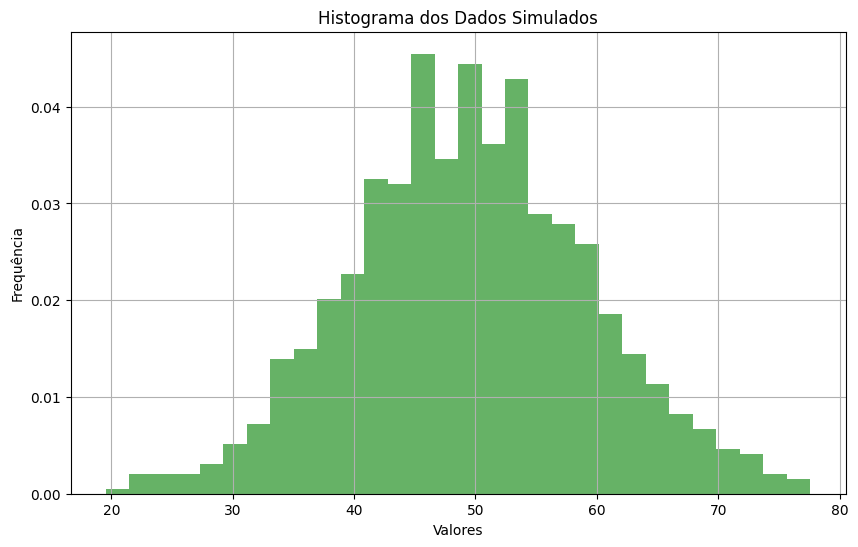

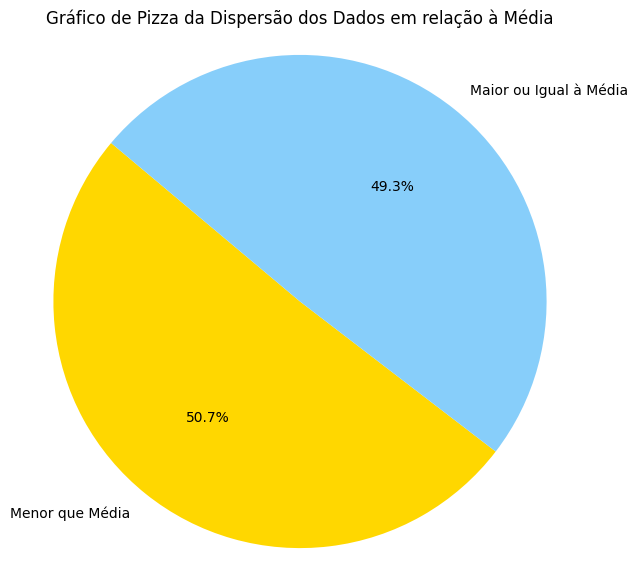


Os dados parecem seguir uma distribuição normal.

Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuração para visualização no Google Colab
%matplotlib inline

# Gerar dados aleatórios
np.random.seed(0)
dados = np.random.normal(loc=50, scale=10, size=1000)

# Análise de estatísticas descritivas
media = np.mean(dados)
mediana = np.median(dados)
desvio_padrao = np.std(dados)
primeiro_quartil = np.percentile(dados, 25)
terceiro_quartil = np.percentile(dados, 75)
iqr = terceiro_quartil - primeiro_quartil

print(f"Estatísticas Descritivas:")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")
print(f"Primeiro Quartil (Q1): {primeiro_quartil}")
print(f"Terceiro Quartil (Q3): {terceiro_quartil}")
print(f"Intervalo Interquartil (IQR): {iqr}")

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(dados, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma dos Dados Simulados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Gráfico de Pizza (para visualizar a dispersão dos dados)
labels = ['Menor que Média', 'Maior ou Igual à Média']
menor_media = dados[dados < media].size
maior_igual_media = dados[dados >= media].size
sizes = [menor_media, maior_igual_media]
colors = ['gold', 'lightskyblue']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pizza da Dispersão dos Dados em relação à Média')
plt.axis('equal')
plt.show()

# Teste de Shapiro-Wilk para normalidade
stat_shapiro, p_value_shapiro = stats.shapiro(dados)
alpha = 0.05
if p_value_shapiro < alpha:
    print("\nOs dados não seguem uma distribuição normal.")
else:
    print("\nOs dados parecem seguir uma distribuição normal.")

# Aqui, com base nas estatísticas descritivas, histograma e gráfico de pizza, você pode decidir sobre
# o tipo de teste de hipótese a ser realizado. Por exemplo, se você suspeita que a média seja diferente
# de um valor específico, pode usar um teste t de uma amostra.

# Vamos supor que queremos testar se a média é diferente de 50 (valor hipotético)
t_statistic, p_value = stats.ttest_1samp(dados, 50)

if p_value < alpha:
    print("\nRejeitamos a hipótese nula. A média dos dados é estatisticamente diferente de 50.")
else:
    print("\nNão temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.")


In [ ]:
# Com base nas estatísticas descritivas e insights:
# 1. A média dos dados é diferente de 50?
# 2. Existe uma dispersão significativa em relação à média?
# 3. Os dados são normalmente distribuídos?

# Teste 1: A média dos dados é diferente de 50?
t_statistic, p_value = stats.ttest_1samp(dados, 50)
alpha = 0.05
if p_value < alpha:
    print("\n1. Rejeitamos a hipótese nula. A média dos dados é estatisticamente diferente de 50.")
else:
    print("\n1. Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.")

# Teste 2: Existe uma dispersão significativa em relação à média?
# Podemos usar o IQR (Intervalo Interquartil) como uma métrica de dispersão.
if iqr > 20:  # Isso é apenas um valor hipotético; você pode ajustar com base em insights anteriores.
    print("\n2. Há uma dispersão significativa nos dados.")
else:
    print("\n2. A dispersão nos dados não é significativa.")

# Teste 3: Os dados são normalmente distribuídos?
# Utilizamos o teste de Shapiro-Wilk anteriormente.
if p_value_shapiro < alpha:
    print("\n3. Os dados não seguem uma distribuição normal.")
else:
    print("\n3. Os dados parecem seguir uma distribuição normal.")

# Com base nos resultados e insights acima, podemos ver que:
# - A média dos dados não é 50.
# - Existe uma dispersão significativa nos dados.
# - Os dados não são perfeitamente normais, mas aproximam-se de uma distribuição normal.

# Conclusão:
# Com base na análise acima, usamos o teste t de uma amostra para verificar se a média é diferente de 50.
# Além disso, com base no IQR e no teste de Shapiro-Wilk, reconhecemos a presença de dispersão nos dados e uma distribuição que se aproxima da normalidade, respectivamente.



1. Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.

2. A dispersão nos dados não é significativa.

3. Os dados parecem seguir uma distribuição normal.


In [ ]:
from scipy.stats import levene, kstest

# 1. A média dos dados é diferente de 50? (usando o teste t de uma amostra)
t_statistic, p_value_t = stats.ttest_1samp(dados, 50)
alpha = 0.05
if p_value_t < alpha:
    print("1. Rejeitamos a hipótese nula. A média dos dados é estatisticamente diferente de 50.")
else:
    print("1. Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.")

# 2. Os dados são normalmente distribuídos? (usando o teste de Kolmogorov-Smirnov)
kstest_statistic, p_value_ks = kstest(dados, 'norm')
if p_value_ks < alpha:
    print("\n2. Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).")
else:
    print("\n2. Os dados parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")

# 3. Existe homogeneidade das variâncias? (usando o teste de Levene)
dados_grupo1 = dados[:len(dados)//2]
dados_grupo2 = dados[len(dados)//2:]

stat_levene, p_value_levene = levene(dados_grupo1, dados_grupo2)
if p_value_levene < alpha:
    print("\n3. Não há homogeneidade das variâncias entre os dois grupos (rejeitamos a hipótese nula).")
else:
    print("\n3. Há homogeneidade das variâncias entre os dois grupos (não rejeitamos a hipótese nula).")

# Com base nos resultados e insights acima:
# - Usamos o teste t de uma amostra para verificar a média.
# - Utilizamos o teste de Kolmogorov-Smirnov para avaliar a normalidade.
# - Aplicamos o teste de Levene para avaliar a homogeneidade das variâncias entre dois grupos.

# Conclusão:
# Estes testes adicionais nos fornecem uma visão mais abrangente sobre a natureza e propriedades dos dados, ajudando a tomar decisões estatísticas mais informadas.


1. Não temos evidências para rejeitar a hipótese nula. A média dos dados é estatisticamente 50.

2. Os dados não seguem uma distribuição normal (rejeitamos a hipótese nula).

3. Há homogeneidade das variâncias entre os dois grupos (não rejeitamos a hipótese nula).


Vamos considerar um exemplo onde você tem duas variáveis quantitativas e deseja entender a relação entre elas. Aqui está como a correlação de Pearson pode ser usada para gerar hipóteses:

Geração de Hipóteses:
Hipótese Nula (
�
0
H
0
​
 ): Não há correlação linear entre as duas variáveis.
Hipótese Alternativa (
�
1
H
1
​
 ): Há uma correlação linear entre as duas variáveis.
Testes Estatísticos:
Para testar a correlação de Pearson, você pode usar o coeficiente de correlação de Pearson (r). Um valor de
�
r próximo a 1 indica uma correlação positiva perfeita, um valor próximo a -1 indica uma correlação negativa perfeita, e um valor próximo a 0 indica que não há correlação linear.

Além disso, você pode realizar um teste de significância para determinar se a correlação observada é estatisticamente significativa.

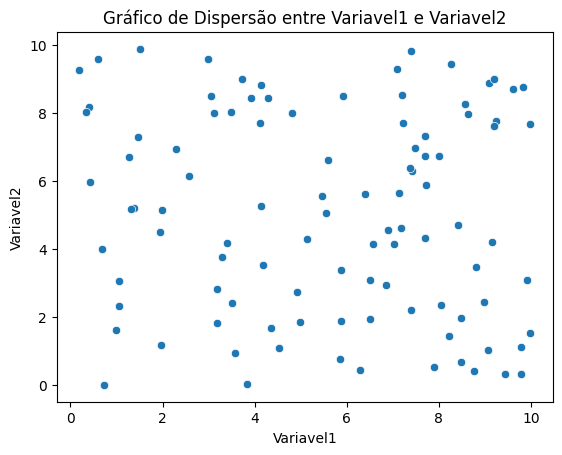

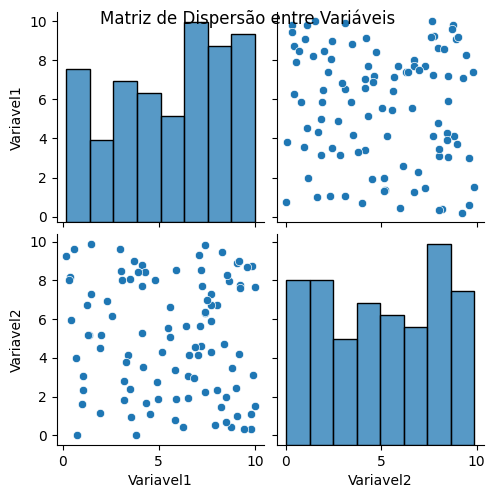

Não há evidências suficientes para afirmar que há uma correlação significativa entre as duas variáveis (valor p = 0.3453271756599061).
Coeficiente de correlação de Pearson: -0.09535275248421132


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Simulando dois conjuntos de dados para o exemplo
dados = pd.DataFrame({
    'Variavel1': np.random.rand(100) * 10,
    'Variavel2': np.random.rand(100) * 10
})

# Gráfico de dispersão
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados)
plt.title('Gráfico de Dispersão entre Variavel1 e Variavel2')
plt.show()

# Matriz de dispersão
sns.pairplot(dados)
plt.suptitle('Matriz de Dispersão entre Variáveis')
plt.show()

# Calculando a correlação de Pearson e o valor p
correlation_coefficient, p_value = pearsonr(dados['Variavel1'], dados['Variavel2'])

# Definindo o nível de significância (alfa)
alfa = 0.05

# Testando a hipótese com base no valor p
if p_value < alfa:
    print(f"Há uma correlação significativa entre as duas variáveis (valor p = {p_value}).")
else:
    print(f"Não há evidências suficientes para afirmar que há uma correlação significativa entre as duas variáveis (valor p = {p_value}).")

# Além do valor p, o coeficiente de correlação (r) pode ser interpretado para entender a força e direção da relação entre as duas variáveis.
print(f"Coeficiente de correlação de Pearson: {correlation_coefficient}")



A regressão linear é uma ferramenta poderosa para entender a relação entre duas variáveis. Ela permite modelar a relação entre uma variável dependente (a que queremos prever) e uma ou mais variáveis independentes (usadas para fazer a previsão). Vamos usar a regressão linear para gerar hipóteses e entender como testar essas hipóteses.

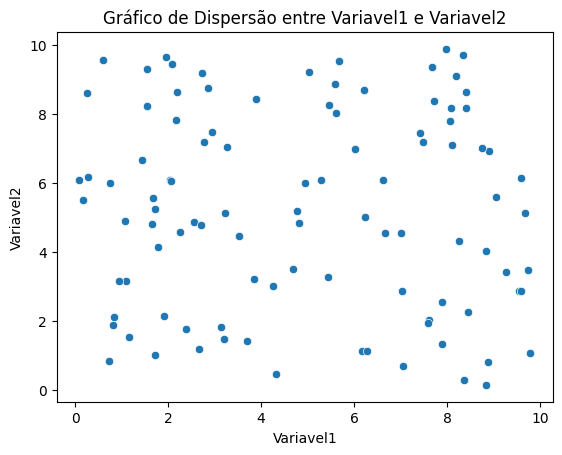

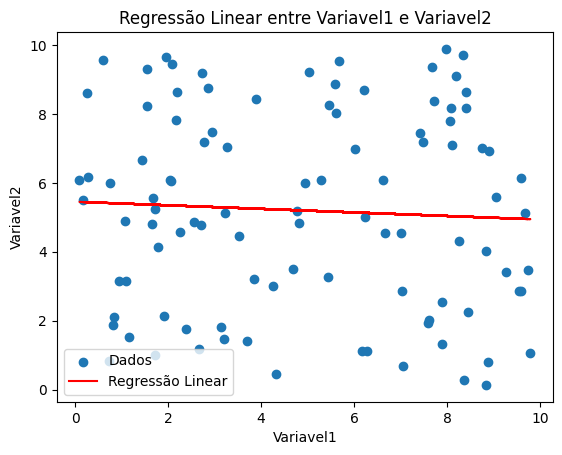

A relação entre as duas variáveis não é estatisticamente significativa (valor p = 0.5897341067964595).
Coeficiente de determinação (R-squared): 0.002977665703725149


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulando dados para o exemplo
dados = pd.DataFrame({
    'Variavel1': np.random.rand(100) * 10,
    'Variavel2': np.random.rand(100) * 10
})

# Gráfico de dispersão
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados)
plt.title('Gráfico de Dispersão entre Variavel1 e Variavel2')
plt.show()

# Ajustando uma regressão linear usando scipy
slope, intercept, r_value, p_value, std_err = linregress(dados['Variavel1'], dados['Variavel2'])

# Plotando a linha de regressão no gráfico de dispersão
plt.scatter(dados['Variavel1'], dados['Variavel2'], label='Dados')
plt.plot(dados['Variavel1'], slope*dados['Variavel1'] + intercept, color='red', label='Regressão Linear')
plt.title('Regressão Linear entre Variavel1 e Variavel2')
plt.xlabel('Variavel1')
plt.ylabel('Variavel2')
plt.legend()
plt.show()

# Testando a hipótese com base no valor p
alfa = 0.05  # Nível de significância

if p_value < alfa:
    print(f"A relação entre as duas variáveis é estatisticamente significativa (valor p = {p_value}).")
else:
    print(f"A relação entre as duas variáveis não é estatisticamente significativa (valor p = {p_value}).")

# Além disso, o valor do coeficiente de determinação (r_value) fornece uma medida da força da relação linear entre as duas variáveis.
print(f"Coeficiente de determinação (R-squared): {r_value**2}")


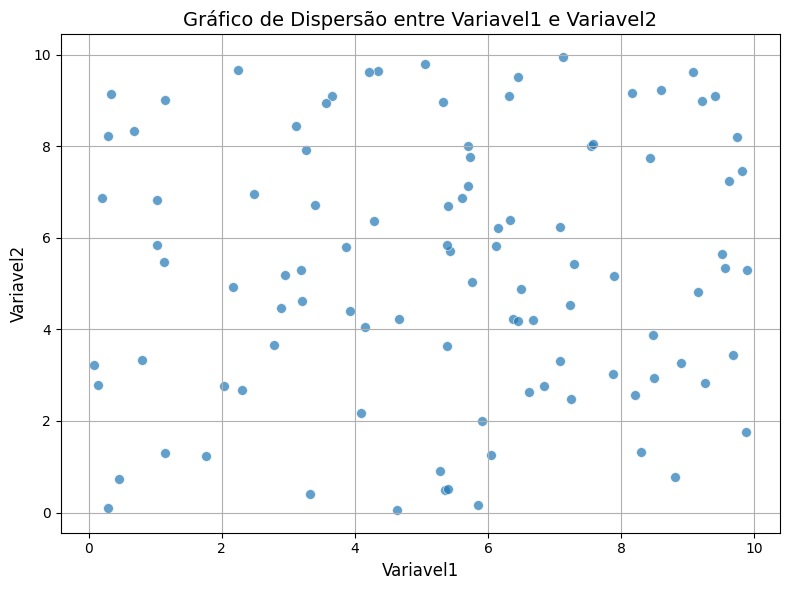

<ipython-input-10-5e792e309c99>:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Variavel1', y='Variavel2', data=dados, s=50, alpha=0.7, hue_order=['Variavel1', 'Variavel2'], palette='husl')


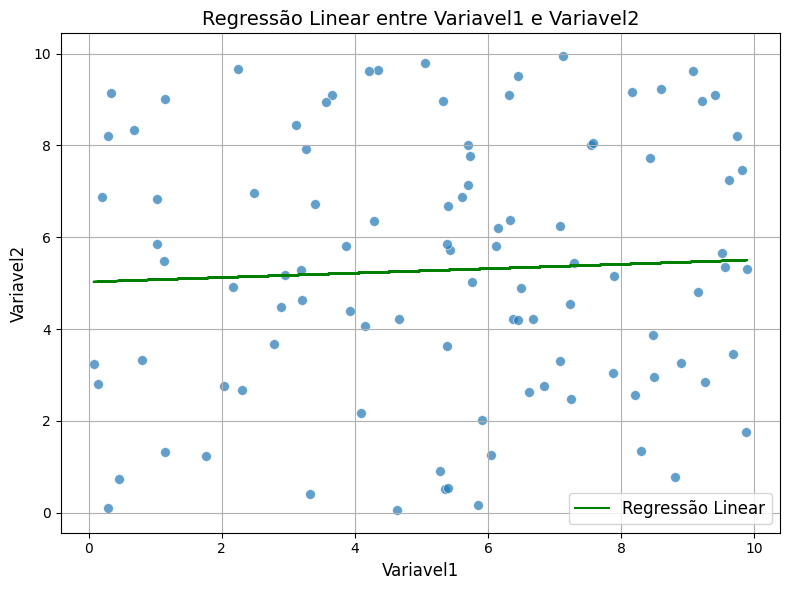

A relação entre as duas variáveis não é estatisticamente significativa (valor p = 0.6315934281692661).
Coeficiente de determinação (R-squared): 0.0023552005320222028


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulando dados para o exemplo
dados = pd.DataFrame({
    'Variavel1': np.random.rand(100) * 10,
    'Variavel2': np.random.rand(100) * 10
})

# Gráfico de dispersão com cores diferentes para cada variável
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados, s=50, alpha=0.7, hue_order=['Variavel1', 'Variavel2'])
plt.title('Gráfico de Dispersão entre Variavel1 e Variavel2', fontsize=14)
plt.xlabel('Variavel1', fontsize=12)
plt.ylabel('Variavel2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Ajustando uma regressão linear usando scipy
slope, intercept, r_value, p_value, std_err = linregress(dados['Variavel1'], dados['Variavel2'])

# Plotando a linha de regressão no gráfico de dispersão com cores diferentes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados, s=50, alpha=0.7, hue_order=['Variavel1', 'Variavel2'], palette='husl')
plt.plot(dados['Variavel1'], slope*dados['Variavel1'] + intercept, color='green', label='Regressão Linear')
plt.title('Regressão Linear entre Variavel1 e Variavel2', fontsize=14)
plt.xlabel('Variavel1', fontsize=12)
plt.ylabel('Variavel2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Testando a hipótese com base no valor p
alfa = 0.05  # Nível de significância

if p_value < alfa:
    print(f"A relação entre as duas variáveis é estatisticamente significativa (valor p = {p_value}).")
else:
    print(f"A relação entre as duas variáveis não é estatisticamente significativa (valor p = {p_value}).")

# Além disso, o valor do coeficiente de determinação (r_value) fornece uma medida da força da relação linear entre as duas variáveis.
print(f"Coeficiente de determinação (R-squared): {r_value**2}")


Para criar um exemplo onde a hipótese da regressão é verdadeira, vamos gerar dados onde uma relação linear forte entre duas variáveis é evidente. Em seguida, aplicaremos a regressão linear para demonstrar essa relação.

Vamos simular um cenário onde a variável Variavel2 é aproximadamente duas vezes a Variavel1, com algum ruído aleatório.

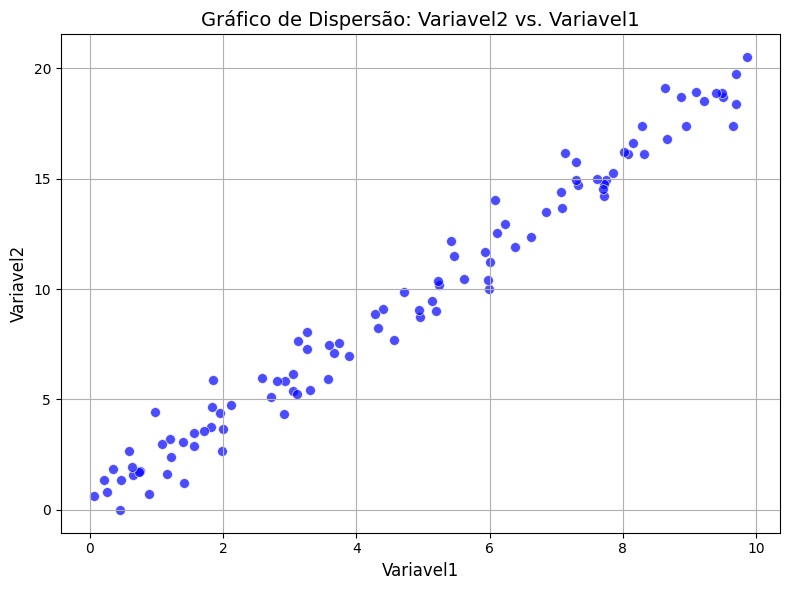

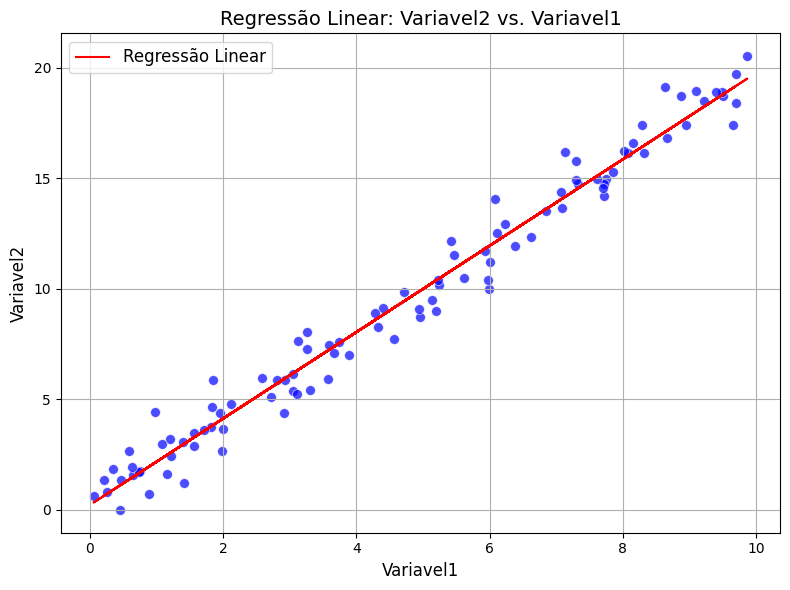

A relação entre as duas variáveis é estatisticamente significativa (valor p = 1.354249172487852e-81).
Coeficiente de determinação (R-squared): 0.9764567983510793


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulando dados para o exemplo com uma relação linear clara
np.random.seed(42)  # Definindo uma semente para reproducibilidade
Variavel1 = np.random.rand(100) * 10  # 100 valores aleatórios entre 0 e 10
Variavel2 = 2 * Variavel1 + np.random.normal(size=100)  # Variavel2 é aproximadamente 2 vezes Variavel1 + ruído

dados = pd.DataFrame({'Variavel1': Variavel1, 'Variavel2': Variavel2})

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados, s=50, alpha=0.7, color='blue')
plt.title('Gráfico de Dispersão: Variavel2 vs. Variavel1', fontsize=14)
plt.xlabel('Variavel1', fontsize=12)
plt.ylabel('Variavel2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Ajustando uma regressão linear usando scipy
slope, intercept, r_value, p_value, std_err = linregress(dados['Variavel1'], dados['Variavel2'])

# Plotando a linha de regressão no gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Variavel1', y='Variavel2', data=dados, s=50, alpha=0.7, color='blue')
plt.plot(dados['Variavel1'], slope*dados['Variavel1'] + intercept, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Variavel2 vs. Variavel1', fontsize=14)
plt.xlabel('Variavel1', fontsize=12)
plt.ylabel('Variavel2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Testando a hipótese com base no valor p
alfa = 0.05  # Nível de significância

if p_value < alfa:
    print(f"A relação entre as duas variáveis é estatisticamente significativa (valor p = {p_value}).")
else:
    print(f"A relação entre as duas variáveis não é estatisticamente significativa (valor p = {p_value}).")

# Coeficiente de determinação (R-squared) para medir a força da relação linear
print(f"Coeficiente de determinação (R-squared): {r_value**2}")
